# Final Project

For the following project, you will be working with a movie dataset. The dataset is [here](https://drive.google.com/file/d/1R53inu8Jcb9GGoyiuVnBMVnO7XvCaJAE/view?usp=drive_link). The dataset columns are as follows:

* Title: The movie's title
* Genre: The movie's genre
* Stars: The number of famous actors in the movie
* Runtime: The length of the movie's runtime
* Budget: How much was spent on filming the movie (in millions)
* Promo: How much money was spent promoting the movie (in millions)
* Season: The season in which the movie was released
* Rating: The movie's rating
* R1: Reviewer 1's review
* R2: Reviewer 2's review
* R3: Reviewer 3's review

And the target variable:

* Success: Whether the film was a success or a flop

Fill in the answers to questions in the text field, and show your code below.

# Data loading

Load the data

In [255]:
import pandas as pd

df = pd.read_csv('./CMSC320FinalProjectData.csv')

# Data Cleaning

List the three biggest data errors below, with a summary of how you fixed them and why you choose that method:

1. Runtime at 0:

I dealt with movies that had runtimes with 0 by opting to delete the entire row. I did this because there were so few movies with runtime 0 compared to the overall dataset. Additionally, we are not at a loss for data as the dataset is very large and plentiful. 

2. Absurdly large budgets:

There were definetly skewed data points when it came to budget. I googled it, and the largest budget in movie history is $447 million. So to clean this problem, I have decided to use mean imputation as there is a decent amount of movies that have budgets > 447 in this dataset and I value the other data they bring. 

3. Movies with 100 stars:

Only a handful of movies somehow had 100 stars which is a complete outlier. Decided to delete the entire row as it was only a couple. 
*

In [327]:
print("Checking for outliers and unsusual data ... Cleaning Below")
max_runtime = df['Runtime'].max()
print(f"Max runtime: {max_runtime}")
min_runtime = df['Runtime'].min() 
print(f"Min runtime: {min_runtime}")
max_stars = df['Stars'].max()
print(f"Max stars: {max_stars}")
max_year = df['Year'].max()
print(f"Max year: {max_year}")
min_year = df['Year'].min()
print(f"Min year: {min_year}")
max_budget = df['Budget'].max()
print(f"Max budget: {max_budget}")
min_budget = df['Budget'].min()
print(f"Min budget: {min_budget}")
max_promo = df['Promo'].max()
print(f"Max Promo: {max_promo}") #Seems large, but seems reasonable
min_promo = df['Promo'].min()
print(f"Min Promo: {min_promo}")

Checking for outliers and unsusual data ... Cleaning Below
Max runtime: 155
Min runtime: 0
Max stars: 100
Max year: 2023
Min year: 2000
Max budget: 160841585.09163028
Min budget: 21.750323342668523
Max Promo: 321.2034831219867
Min Promo: 12.845040139587722


In [329]:
#Cleaning runtime set to 0

df_clean_runtime = df[df['Runtime'] != 0]

min_runtime = df_clean_runtime['Runtime'].min() 
print(f"Min runtime: {min_runtime}")

#Cleaning stars set to 100

df_clean_stars = df_clean_runtime[df_clean_runtime['Stars'] != 100]

max_stars = df_clean_stars['Stars'].max()
print(f"Max stars: {max_stars}")

#Cleaning extremly large budgets 

high_budget_rows = df_clean_stars['Budget'] > 447
mean_budget = df_clean_stars.loc[~high_budget_rows, 'Budget'].mean()
df_clean_stars.loc[high_budget_rows, 'Budget'] = mean_budget
cleaned_df = df_clean_stars

max_budget = cleaned_df['Budget'].max()
print(f"Max budget: {max_budget}")

Min runtime: 109
Max stars: 5
Max budget: 327.41546290849664


# Data Exploration





Does Season have a stastically significant impact on a movie's success?

**p-value:** 0.001918843577520339

In [49]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(cleaned_df['Season'], cleaned_df['Success'])
print(contingency_table)
chi2, p_value, _, _ = chi2_contingency(contingency_table)
print(p_value)

Success  False  True 
Season               
Fall        86     23
Spring      85      7
Summer     145     55
Winter      94     26
0.001918843577520339


Do seasons have a statistically significant difference in their distribution of content ratings?

**p-value:** 0.23891250884745718

In [50]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(cleaned_df['Season'], cleaned_df['Rating'])
print(contingency_table)
chi2, p_value, _, _ = chi2_contingency(contingency_table)
print(p_value)

Rating  PG  PG13   R
Season              
Fall    41    37  31
Spring  31    34  27
Summer  63    67  70
Winter  54    38  28
0.23891250884745718


Who is the harshest critic (highest precent of negative reviews)?

**Critic:** R1

Had to perform sentiment analysis here.

In [262]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

Function to classify sentiment as negative
def classify_sentiment(score):
    return 'Negative' if score < 0 else 'Positive'

# Create new columns for sentiment score for each Reviewer
cleaned_df['R1_Sentiment'] = cleaned_df['R1'].apply(lambda x: sid.polarity_scores(x)['compound'])
cleaned_df['R2_Sentiment'] = cleaned_df['R2'].apply(lambda x: sid.polarity_scores(x)['compound'])
cleaned_df['R3_Sentiment'] = cleaned_df['R3'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Create new columns classifying numeric score into categorial score from Sentiment columns above
cleaned_df.loc[:, 'R1_Sentiment_Class'] = cleaned_df['R1_Sentiment'].apply(classify_sentiment)
cleaned_df.loc[:, 'R2_Sentiment_Class'] = cleaned_df['R2_Sentiment'].apply(classify_sentiment)
cleaned_df.loc[:, 'R3_Sentiment_Class'] = cleaned_df['R3_Sentiment'].apply(classify_sentiment)

# Calculate the percentage of negative reviews for each critic
r1_negative_percentage = (cleaned_df.loc[:, 'R1_Sentiment_Class'] == 'Negative').mean() * 100
r2_negative_percentage = (cleaned_df.loc[:, 'R2_Sentiment_Class'] == 'Negative').mean() * 100
r3_negative_percentage = (cleaned_df.loc[:, 'R3_Sentiment_Class'] == 'Negative').mean() * 100

print(r1_negative_percentage)
print(r2_negative_percentage)
print(r3_negative_percentage)



51.24760076775432
39.923224568138195
32.437619961612285


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\RyanJ\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
C:\Users\RyanJ\AppData\Local\Temp\ipykernel_6712\1928203620.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['R1_Sentiment'] = cleaned_df['R1'].apply(lambda x: sid.polarity_scores(x)['compound'])
C:\Users\RyanJ\AppData\Local\Temp\ipykernel_6712\1928203620.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['R2_Senti

What is the covariance between promotional budget and the filming budget?

**Cov:** 1811.0382567140095

In [52]:
covariance = cleaned_df['Promo'].cov(cleaned_df['Budget'])
print(covariance)

1811.0382567140095


# Data Visualization

Create a chart that compares the distribution of the budget for each different number of stars. (It does not need to be particularly appealing.

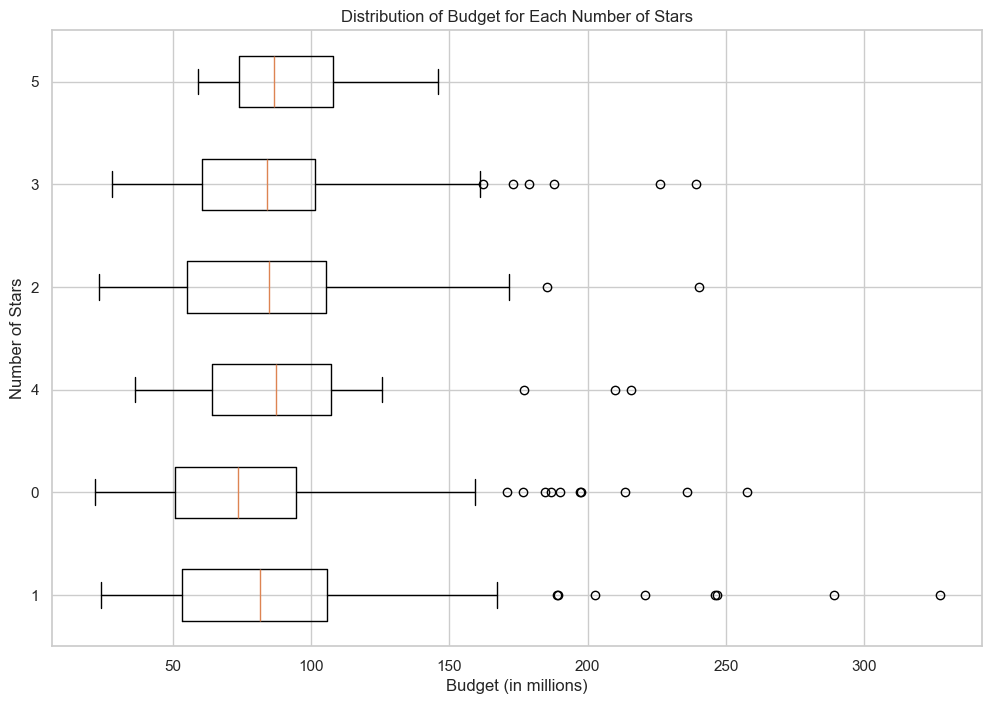

In [330]:
import matplotlib.pyplot as plt

data_by_stars = [cleaned_df[cleaned_df['Stars'] == stars]['Budget'].dropna().values for stars in cleaned_df['Stars'].unique()]

plt.figure(figsize=(12, 8))
plt.boxplot(data_by_stars, labels=cleaned_df['Stars'].unique(), vert=False)

plt.xlabel('Budget (in millions)')
plt.ylabel('Number of Stars')
plt.title('Distribution of Budget for Each Number of Stars')

plt.show()

Create a graph showing the average movie budget over time.

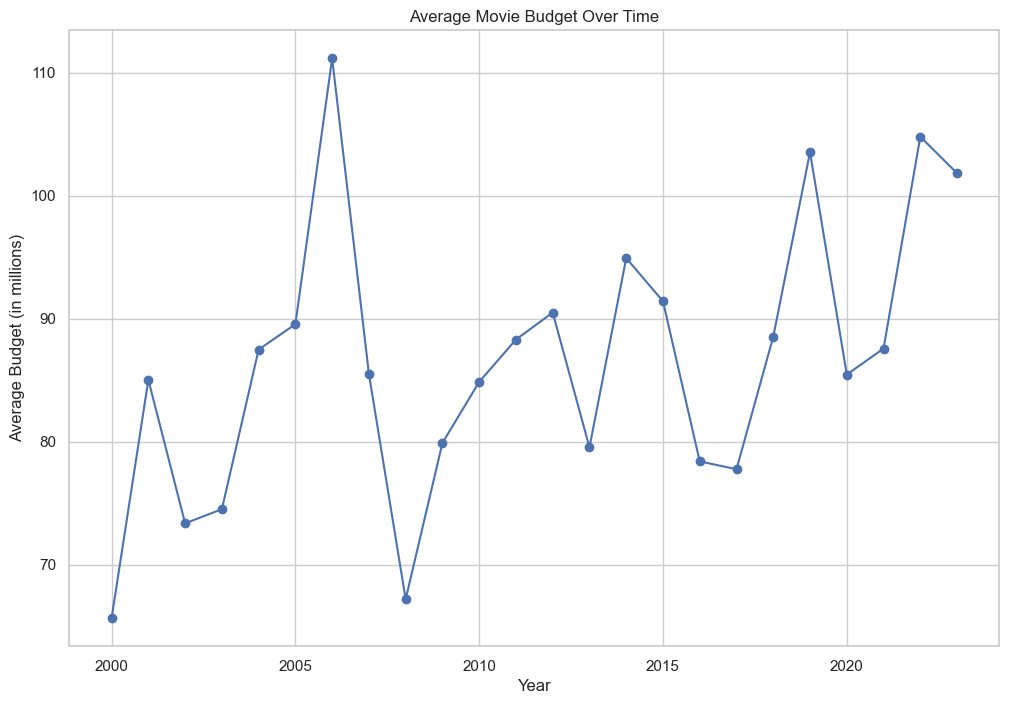

In [331]:
import matplotlib.pyplot as plt


average_budget_by_year = cleaned_df.groupby('Year')['Budget'].mean()

plt.figure(figsize=(12, 8))
plt.plot(average_budget_by_year.index, average_budget_by_year.values, marker='o', linestyle='-', color='b')

plt.xlabel('Year')
plt.ylabel('Average Budget (in millions)')
plt.title('Average Movie Budget Over Time')

plt.grid(True)
plt.show()

# Feature Engineering

List any features you choose to create (if you are creating many features based on one column, you do not need to list them separately.) You are not required to create any features if you do not wish to. You may create any number of additional features.

1. One hot encode Season, Rating, and Genre: These 3 columns are categorical variables so we have to one-hot encode them if we want to use them in our model.

2. Mapping Sentiment Class: I'm going to use what I did for data exploration earlier and use columns R1_Sentiment_Class, R2_Sentiment_Class, R3_Sentiment_Class to represent the critic's sentiment. Since they are strings, I mapped the results to integers -1 and 1. 

In [263]:
cleaned_df = pd.get_dummies(cleaned_df, columns=['Season'], prefix='Season')
cleaned_df = pd.get_dummies(cleaned_df, columns=['Rating'], prefix='Rating')
cleaned_df = pd.get_dummies(cleaned_df, columns=['Genre'], prefix='Genre')

cleaned_df['R1_Sentiment_Class'] = cleaned_df['R1_Sentiment_Class'].map({'Negative': -1, 'Positive': 1})
cleaned_df['R2_Sentiment_Class'] = cleaned_df['R2_Sentiment_Class'].map({'Negative': -1, 'Positive': 1})
cleaned_df['R3_Sentiment_Class'] = cleaned_df['R3_Sentiment_Class'].map({'Negative': -1, 'Positive': 1})
cleaned_df = cleaned_df.dropna(subset=['Success'])


In [266]:
print(cleaned_df.columns.tolist())

['Unnamed: 0', 'Title', 'Runtime', 'Stars', 'Year', 'Budget', 'Promo', 'R1', 'R2', 'R3', 'Success', 'R1_Sentiment', 'R2_Sentiment', 'R3_Sentiment', 'R1_Sentiment_Class', 'R2_Sentiment_Class', 'R3_Sentiment_Class', 'Season_Fall', 'Season_Spring', 'Season_Summer', 'Season_Winter', 'Rating_PG', 'Rating_PG13', 'Rating_R', 'Genre_Action', 'Genre_Drama', 'Genre_Fantasy', 'Genre_Romantic Comedy', 'Genre_Science fiction']


# Modeling

Create a model of your choice.

**Model type choosen:** KNN

Good for classification problems and wanted to use it as I haven't used it before.

In [323]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X = cleaned_df.drop(['Unnamed: 0', 'Title', 'Success', 'R1', 'R2', 'R3', 'R1_Sentiment', 'R2_Sentiment', 'R3_Sentiment'], axis=1)
y = cleaned_df['Success']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

knn_model = KNeighborsClassifier(n_neighbors=5)

knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f'Model Accuracy: {accuracy:.2%}')

Model Accuracy: 81.13%


# Testing

Shuffle your data and break it into a 10% test set and 90% training set. Show your model's accuracy on the test set. In order to get full credit, the model's accuracy must be higher than 50%.

**Model accuracy:** 81.13%

In [317]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

cleaned_df = cleaned_df.sample(frac=1, random_state=42)

X = cleaned_df.drop(['Unnamed: 0', 'Title', 'Success', 'R1', 'R2', 'R3', 'R1_Sentiment', 'R2_Sentiment', 'R3_Sentiment'], axis=1)
y = cleaned_df['Success']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

knn_model = KNeighborsClassifier(n_neighbors=5)

knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f'Model Accuracy: {accuracy:.2%}')

from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

Model Accuracy: 81.13%
[[39  1]
 [ 9  4]]


Show the confusion matrix for your model. To get full credit, your false positive rate and false negative rate must be under 30%.


**False negative rate:** 18.75%

**False positive rate:** 20.00%

In [318]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

# Extract values from the confusion matrix
true_positive, false_positive, false_negative, true_negative = conf_matrix.ravel()

print(f'True Positive: {true_positive}')
print(f'False Positive: {false_positive}')
print(f'False Negative: {false_negative}')
print(f'True Negative: {true_negative}')

# Calculate false positive rate and false negative rate
false_positive_rate = false_positive / (false_positive + true_negative)
false_negative_rate = false_negative / (false_negative + true_positive)

print('Confusion Matrix:')
print(conf_matrix)

print(f'\nFalse Positive Rate: {false_positive_rate:.2%}')
print(f'False Negative Rate: {false_negative_rate:.2%}')


True Positive: 39
False Positive: 1
False Negative: 9
True Negative: 4
Confusion Matrix:
[[39  1]
 [ 9  4]]

False Positive Rate: 20.00%
False Negative Rate: 18.75%


What was the most important feature for your model? Don't guess, either look up how to check or do your own tests.

**Most important feature:** Season_Winter: Whether it was Winter or not. 

This question was hard because when I searched it up, KNN doesn't inherently provide feature importance scores.
However, since KNN is a distance based algorithm, standardization and analysis of distance can help us find feature importance. 

We need to standarize because it helps equalize scaling, ensures equal weight, and gives us interpertable distances and meaningful comparisons. 

After standardizing, we can analyzie the importance of each feature in the model by calculating the contribution of each feature to the distances betwen data points. 

Finally, we sort the features based on their contribution. 

Upon reviewing the answer, it kind of makes sense, I searched it up and winter time (Nov, Dec) is when studios release the films that they think will garner the most awards. And it is also holiday season with Thanksgiving, Christmas, and New Years. 

Additionally, the other season where movies perform the best is Summer, which is traditionally a big blockbuster season. And looking at our feature importance list, Season_Summer comes second. 


In [326]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = cleaned_df.drop(['Unnamed: 0', 'Title', 'Success', 'R1', 'R2', 'R3', 'R1_Sentiment', 'R2_Sentiment', 'R3_Sentiment'], axis=1)
y = cleaned_df['Success']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Make Model
knn_model = KNeighborsClassifier(n_neighbors=5)

knn_model.fit(X_train_scaled, y_train)

y_pred = knn_model.predict(X_test_scaled)

# Feature Importance Analysis
feature_importance = pd.DataFrame(index=X.columns, columns=['Distance Contribution'])

# Distance Contribution Calculation:
for feature in X.columns:
    # Create a copy of the test set to modify for each feature
    X_test_copy = X_test_scaled.copy()
    
    # Change the feature values to the mean
    X_test_copy[:, X.columns.get_loc(feature)] = X_train_scaled[:, X.columns.get_loc(feature)].mean()
    
    # Calculate distances with modified feature values
    distances_original = knn_model.kneighbors(X_test_scaled)[0]
    distances_modified = knn_model.kneighbors(X_test_copy)[0]
    
    # Calculate the contribution of the feature to distances
    contribution = distances_modified.mean() - distances_original.mean()
    
    feature_importance.loc[feature] = contribution

# Sort features by their contribution
feature_importance = feature_importance.sort_values(by='Distance Contribution', ascending=False)

print(feature_importance)

                      Distance Contribution
Season_Winter                      0.113211
Season_Summer                      0.105455
Genre_Action                       0.097472
Rating_PG13                        0.085021
Rating_PG                          0.079519
Rating_R                           0.075403
Season_Spring                      0.071533
Genre_Drama                        0.069382
Genre_Romantic Comedy               0.05133
Season_Fall                        0.032572
Genre_Science fiction              -0.00987
Genre_Fantasy                     -0.011716
Promo                             -0.020936
Stars                             -0.054423
Budget                               -0.072
Year                              -0.093779
Runtime                           -0.101486
R1_Sentiment_Class                -0.108923
R2_Sentiment_Class                -0.113734
R3_Sentiment_Class                -0.115126
